# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [557]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print('data shape: ', X.shape)
print('label shape: ', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape:  (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

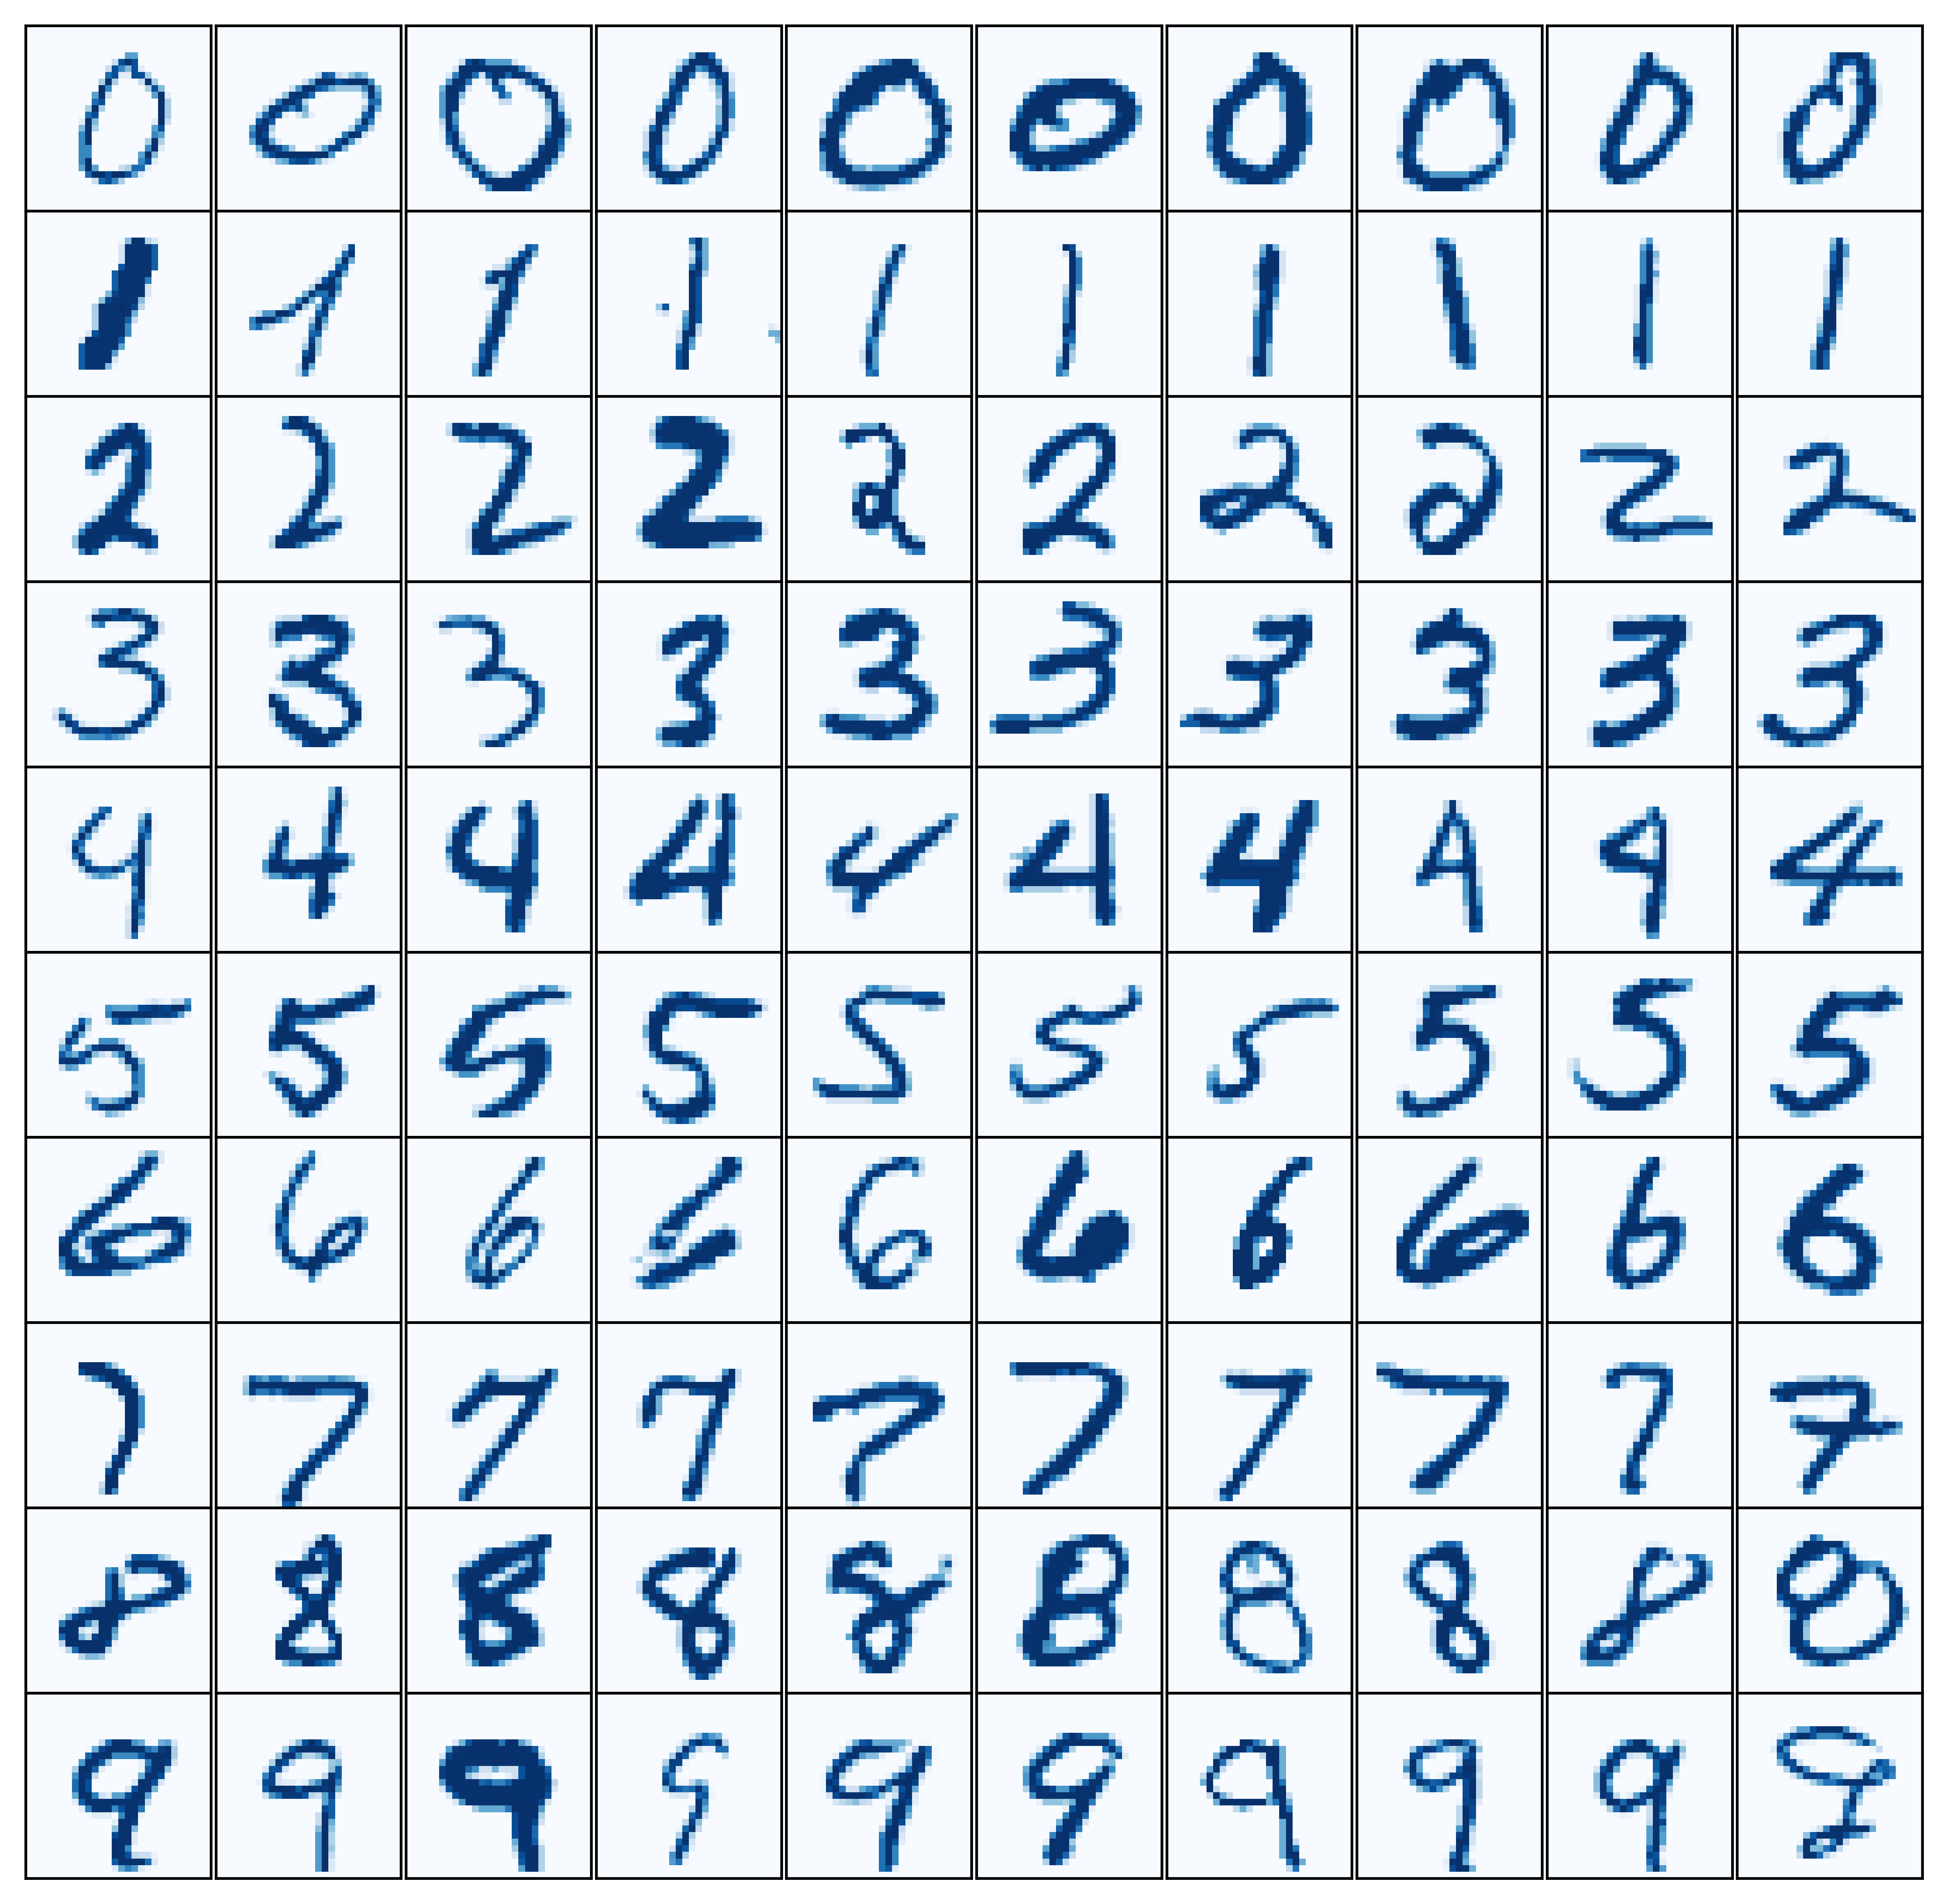

In [558]:
def P1(num_examples=10):

    ### STUDENT START ###
    # Kenneth's comment
    # each image is 28 by 28 = 784 pixels
    # There are 70,000 images, corresponding to 70,000 rows with their pixels spread out or unrolled to 784 columns

    # Setting how a plot should look like
    # np.unique chooses the label 0 to 9, total = 10 labels
    # figsize is a tuple value for inches in size
    
    plt.rc('image', cmap='Blues')
    plt.figure(figsize=(num_examples,len(np.unique(Y))), dpi=X.shape[1])

    
    for i in np.nditer(np.unique(Y)):                     # looping all Y labels: 0 to 9
        features = X[Y == i][:num_examples]               # features (785 pixels) for each label (digits), Boolean selection with the label 
        for j in range(num_examples):                     # looping user input, number of examples for each label
            plt.subplot(len(np.unique(Y)), num_examples, i * num_examples + j + 1)   # plt.subplot(nrows, ncols, index)
            plt.subplots_adjust(wspace=0, hspace=0)
            
            ax = plt.gca()                                # assigning plot axes to 'ax'
            ax.set_xticks([])                             # removing ticks on x-axis
            ax.set_yticks([])                             # removing ticks on y-axis
            
            # Plot the corresponding digit (reshaped to square matrix/image)
            dim = int(np.sqrt(X.shape[1]))                # the original image dimension by taking squared root
            digit = features[j].reshape((dim,dim))        # reshaping the unrolled 785 features (pixels) into original dimension (28 x 28)     
            plt.imshow(digit)                             # showing the image
    
    ### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [122]:
def P2(k_values):

    ### STUDENT START ###
    
    for k in k_values:
    
        KNN_model = KNeighborsClassifier(n_neighbors=k)            # Create a KNN model 
        KNN_model.fit(mini_train_data, mini_train_labels)          # Fit the model with the mini training set
        predicted_dev_labels = KNN_model.predict(dev_data)         # predict the dev_data

        print("k-value = {}, Accuracy = {}".format(k, KNN_model.score(dev_data, dev_labels)))

        # Showing precision, recall, and F1 for each label.
        if k == 1:
            labels = np.unique(Y).astype(int).astype(str)
            print("\nPrecission, recall, and F1 for each digit when k = 1:")
            print(classification_report(dev_labels, predicted_dev_labels, target_names = labels))


    ### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k-value = 1, Accuracy = 0.888

Precission, recall, and F1 for each digit when k = 1:
             precision    recall  f1-score   support

          0       0.91      0.98      0.94        99
          1       0.89      1.00      0.94       105
          2       0.99      0.79      0.88       102
          3       0.77      0.87      0.82        86
          4       0.89      0.82      0.85       104
          5       0.93      0.84      0.88        91
          6       0.94      0.96      0.95        98
          7       0.89      0.92      0.90       113
          8       0.94      0.88      0.91        96
          9       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

k-value = 3, Accuracy = 0.878
k-value = 5, Accuracy = 0.869
k-value = 7, Accuracy = 0.865
k-value = 9, Accuracy = 0.863


ANSWER:  
**(Kenneth's)  
With k-value of 1, precision for predicting number `3` is poor at 0.77. Recall is poor for number `2` with 0.79. However number `9` seems a difficult digit to predict because f1-score is the lowest with 0.80. Since f1-score represents both precision and recall, number `9` is the most difficult digit to predict.** 

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [84]:
def P3(train_sizes, accuracies):

    ### STUDENT START ###
    
    KNN_model = KNeighborsClassifier(n_neighbors=1)                # fitting KNN with k=1
    
    for size in train_sizes:
        custom_data = train_data[:size]                            # defining the train size from the original training data
        custom_label = train_labels[:size]
        
        KNN_model.fit(custom_data, custom_label)
        
        t1 = time.time()                                           # start time before prediction
        predicted_dev_label = KNN_model.predict(dev_data)
        t2 = time.time()
        
        score = KNN_model.score(dev_data, dev_labels)
        accuracies.append(score)                                   # appending the accuracy score to the list to return later
        
        # printing here will allow to see the result on the fly
        print("k-value = 1, Accuracy = {:.3f}".format(score))
        print("Time taken to predict dev_data with train size of {} is {:.3f}\n".format(size, t2-t1))
        
    return accuracies

    ### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

k-value = 1, Accuracy = 0.720
Time taken to predict dev_data with train size of 100 is 0.120

k-value = 1, Accuracy = 0.786
Time taken to predict dev_data with train size of 200 is 0.202

k-value = 1, Accuracy = 0.841
Time taken to predict dev_data with train size of 400 is 0.518

k-value = 1, Accuracy = 0.884
Time taken to predict dev_data with train size of 800 is 1.307

k-value = 1, Accuracy = 0.902
Time taken to predict dev_data with train size of 1600 is 1.944

k-value = 1, Accuracy = 0.926
Time taken to predict dev_data with train size of 3200 is 4.197

k-value = 1, Accuracy = 0.937
Time taken to predict dev_data with train size of 6400 is 8.106

k-value = 1, Accuracy = 0.959
Time taken to predict dev_data with train size of 12800 is 17.357

k-value = 1, Accuracy = 0.970
Time taken to predict dev_data with train size of 25000 is 33.352



[0.72, 0.786, 0.841, 0.884, 0.902, 0.926, 0.937, 0.959, 0.97]

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

Accuracy of prediction when linearly fitted : [[1.24307226]]
Accuracy of prediction when log fitted      : [[1.03386514]]
Accuracy of prediction when feature scaled  : [[1.24307226]]


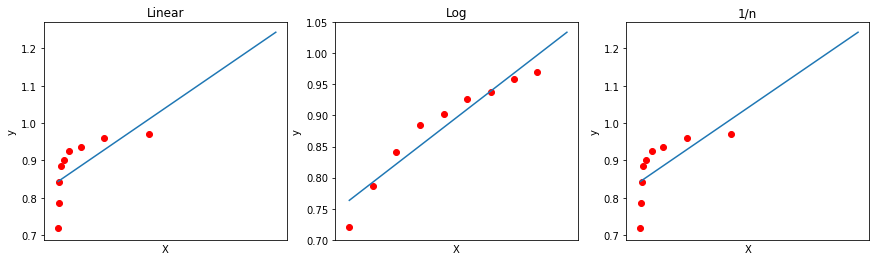

In [113]:
def P4():

    ### STUDENT START ###
    
    # LinearRegression() fit requires 2 dimension array. 
    # np.newaxis allows to create an additional array in our existing 1-D array.
    
    X = np.array(train_sizes)[:,np.newaxis]
    y = np.array(accuracies)[:,np.newaxis]
    lm = LinearRegression()
    lm.fit(X, y)
    pred_value_linear = lm.predict(60000)
    print("Accuracy of prediction when linearly fitted :", pred_value_linear)
    
    # To check how our model performs with the training data
    plt.figure(figsize=(20, 4))
    ax = plt.subplot(1, 4, 1)
    plt.setp(ax, xticks=())
    x = np.linspace(X.min(), 60000, 1000)[:,np.newaxis]
    plt.plot(x, lm.predict(x))
    plt.scatter(X, y, color='red')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title('Linear')
    
    # Transformation of X and y
    # 1. Transforming training size values by taking log
    
    X_trans1 = np.log(X)
    lm.fit(X_trans1, y)
    pred_value_log = lm.predict(np.log(60000))
    print("Accuracy of prediction when log fitted      :", pred_value_log)
    
    ax1 = plt.subplot(1, 4, 2)
    plt.setp(ax1, xticks=())
    x = np.linspace(X_trans1.min(), np.log(60000))[:,np.newaxis]
    plt.plot(x, lm.predict(x))
    plt.scatter(X_trans1, y, color='red')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title('Log')
    
    # 2. Transforming training size by taking 1/n
    
    X_trans2 = X/60000
    lm.fit(X_trans2, y)
    pred_value_fraction = lm.predict(60000/60000)
    print("Accuracy of prediction when feature scaled  :", pred_value_fraction)
    
    ax1 = plt.subplot(1, 4, 3)
    plt.setp(ax1, xticks=())
    x = np.linspace(X_trans2.min(), (60000/60000))[:,np.newaxis]
    plt.plot(x, lm.predict(x))
    plt.scatter(X_trans2, y, color='red')
    plt.xlabel("X")
    plt.ylabel("y")
    plt.title('1/n')
    
    
    ### STUDENT END ###

P4()

ANSWER:  
**(Kenneth's)  
Using 60,000 training size, the accuracy is actually 0.977 using the P3 function we defined earlier (I tested the P3(60000). However using the linear model, the accuracy is 1.243, which is theoretically impossible since it's above 1. However taking the log of the training size makes our regression model more fitted although the accuracy is still above 1. But the model looks better than linear regression. I also implemented a feature scaling by dividing the training size by the largest training size we have 60,000. The model looks like the original linear regression model and does not help to improve the regression. Overall, log transformation help fits our model better.**

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]

This is the confusion matrix with only mis-matched pairs

[[ 0  0  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0]
 [ 4  4  0  4  0  0  0  4  3  2]
 [ 1  0  0  0  0  3  0  3  1  3]
 [ 0  2  0  0  0  0  3  0  0 14]
 [ 2  0  0  9  0  0  0  1  1  2]
 [ 1  1  1  0  1  0  0  0  0  0]
 [ 1  4  0  1  1  0  0  0  0  2]
 [ 0  2  0  5  0  2  1  0  0  2]
 [ 1  0  0  3  9  1  0  5  0  0]]

This is the highest mis-matched value in each column

[2 2 6 5 9 3 4 9 2 4]
The predicted value of 0 is actually the digit 2
The predicted value of 1 is actually the digit 2
The 

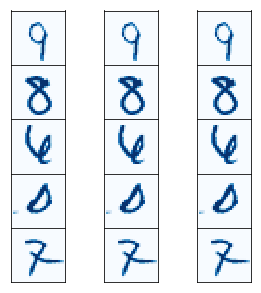

In [178]:
def P5():

    ### STUDENT START ###

    KNN_model = KNeighborsClassifier(n_neighbors=1)
    KNN_model.fit(mini_train_data, mini_train_labels)
    predicted_dev_labels = KNN_model.predict(dev_data)
    
    # confusion_matrix(true_labels, predicted_labels)
    # x-axis = predicted
    # y-axis = actual value
    # diagonal is therefore accurately predicted
    
    cm = confusion_matrix(dev_labels, KNN_model.predict(dev_data))
    print(cm)
    
    # confusion matrix (cm) with only mis-matched (mm) value
    # need to duplicate the confusion matrix to modify 

    cm_mm = cm
    np.fill_diagonal(cm_mm,0)
    print("\nThis is the confusion matrix with only mis-matched pairs\n")
    print(cm_mm)
    
    print("\nThis is the highest mis-matched value in each column\n")
    pred_actual = np.argmax(cm_mm, axis=0)                  # predicted and actual mis-matched
    print(pred_actual)

    for i in range(len(pred_actual)):
        print("The predicted value of {} is actually the digit {}".format(i, pred_actual[i]))
    
    # selecting the mis-matched prediction by Boolean
    predicted_incorrect = (predicted_dev_labels != dev_labels)
    
    # Applying the Boolean into dev_data (780 pixels) and dev_label (digits)
    dev_data_mm = dev_data[predicted_incorrect]
    dev_labels_mm = dev_labels[predicted_incorrect]
    predicted_dev_labels_mm = predicted_dev_labels[predicted_incorrect]
    
    confused_pairs = 5
    num_examples = 3
    
    plt.rc('image', cmap='Blues')
    plt.figure(figsize=(5,5))
    for i in range(confused_pairs):
        features = dev_data_mm[dev_labels_mm == i][:num_examples]
        for j in range(num_examples):
        
            plt.subplot(confused_pairs, num_examples, i * num_examples + j + 1)   # plt.subplot(nrows, ncols, index)
            plt.subplots_adjust(wspace=0, hspace=0)

            ax = plt.gca()                                # assigning plot axes to 'ax'
            ax.set_xticks([])                             # removing ticks on x-axis
            ax.set_yticks([])                             # removing ticks on y-axis
        
            plt.imshow(dev_data_mm[i].reshape((28,28)))   

    
    # the most confused pair of matrix
    # retrieving the coordinate of the most mis-matched pairs by unravel_index function
    most_mm = np.unravel_index(cm_mm.argmax(), cm_mm.shape)
    
    print("\nThe most confused pair of matix is : {} and {}".format(most_mm[0], most_mm[1]))
    print("The predicted value is {} where the actual value is {}".format(most_mm[1], most_mm[0]))
    
    print("\nA few examples of mis-matched values\n")
    
    ### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

Accuracy of Original mini_train_data + dev_data           :  0.888
Accuracy of min_train_data blurred + dev_data             :  0.909
Accuracy of mini_train_data + dev_data blurred            :  0.871
Accuracy of mini_train_data blurred + dev_data blurred    :  0.902

Visualization of digit before and after Gaussian blur



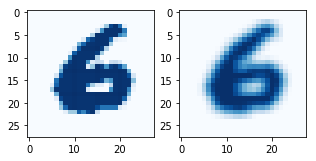

In [216]:
def P6():
    
    ### STUDENT START ###
    # Gaussian function to blur the pixels by neighboring pixels. The first row and the last row were left intact because
    # they all represent 0 and wouldn't make any difference. The edge of the pixels were processed although their 
    # neighboring pixels will be a bit off. The idea is just to make the function concise, instead of going over 
    # all the edges. 
    
    def gaussian_blur(array):
    
        blurred_pixels = []

        for i in range(len(array)): 
            if i < 30: 
                blurred_pixels.append(array[i])
            elif i > 755: 
                blurred_pixels.append(array[i])
            else:
                try:
                    blurred_pixels.append(np.mean([array[i-29], array[i-28], array[i-27],
                                            array[i-1], array[i], array[i+1],
                                            array[i+27], array[i+28], array[i+29]]))
                except:
                    blurred_pixels.append(array[i])

        return blurred_pixels
    
    # Preprocess the mini_train_data 
    
    mini_train_data_blurred = []
    for digit in mini_train_data:
        mini_train_data_blurred.append(gaussian_blur(digit))
    mini_train_data_blurred = np.array(mini_train_data_blurred)
    
    # Preprocess the dev_data 
    
    dev_data_blurred = []
    for digit in dev_data:
        dev_data_blurred.append(gaussian_blur(digit))
    dev_data_blurred = np.array(dev_data_blurred)
    
    # Fit model using original mini_train_data
     
    KNN1 = KNeighborsClassifier(n_neighbors=1)
    KNN1.fit(mini_train_data, mini_train_labels)
    KNN1.predict(dev_data)
    print("Accuracy of Original mini_train_data + dev_data           : ", KNN1.score(dev_data, dev_labels))
    
    KNN2 = KNeighborsClassifier(n_neighbors=1)
    KNN2.fit(mini_train_data_blurred, mini_train_labels)
    KNN2.predict(dev_data)
    print("Accuracy of min_train_data blurred + dev_data             : ", KNN2.score(dev_data, dev_labels))
    
    KNN3 = KNeighborsClassifier(n_neighbors=1)
    KNN3.fit(mini_train_data, mini_train_labels)
    KNN3.predict(dev_data_blurred)
    print("Accuracy of mini_train_data + dev_data blurred            : ", KNN3.score(dev_data_blurred, dev_labels))
    
    KNN4 = KNeighborsClassifier(n_neighbors=1)
    KNN4.fit(mini_train_data_blurred, mini_train_labels)
    KNN4.predict(dev_data_blurred)
    print("Accuracy of mini_train_data blurred + dev_data blurred    : ", KNN4.score(dev_data_blurred, dev_labels))

    print("\nVisualization of digit before and after Gaussian blur\n")
    rand_num = np.random.randint(0, 1000,1)              # selecting any random digit between 0 and 1000 mini_train_data
    plt.figure(figsize=(5,5))
    plt.subplot(1, 2, 1)

    plt.imshow(mini_train_data[rand_num].reshape((28,28)))
    plt.subplot(1, 2, 2)

    plt.imshow(mini_train_data_blurred[rand_num].reshape((28,28)))
    
### STUDENT END ###


P6()

In [213]:
# Kenneth's sanity check if gaussian blurring works by selecting random pixels from the mini_train_data

print(mini_train_data[0][350])
print(mini_train_data_blurred[0][350])

0.7490196078431373
0.49978213507625274


ANSWER:  
**Kenneth's  
After testing on 4 different conditions, preprocessing of training data is the most driving force behind improving the accuracy of predicting the digits. This also reflects the training conditions where by blurring the pixels gives the test data to be more fittable instead of overfitting.**

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [241]:
def P7():

    ### STUDENT START ###
    
    BNB = BernoulliNB(alpha=1, binarize=0.333)
    BNB.fit(mini_train_data, mini_train_labels)
    print("Accuracy of Bernoulli Naive Bayes   : {}".format(BNB.score(dev_data, dev_labels)))

    # Preprocess the training data (pixel) to be 0, 1, 2
    mini_train_data_copy = mini_train_data.copy()
    mini_train_data_copy[mini_train_data_copy < 0.10] = 0
    mini_train_data_copy[np.logical_and(mini_train_data_copy < 0.80, mini_train_data_copy >=0.1)] = 1
    mini_train_data_copy[mini_train_data_copy >= 0.80] = 2

    # Training with MultinomialNB
    MNB = MultinomialNB()
    MNB.fit(mini_train_data_copy, mini_train_labels)
    MNB.predict(dev_data)
    print("Accuracy of Multinomial Naive Bayes : {}".format(MNB.score(dev_data, dev_labels)))
    
    ### STUDENT END ###

P7()

Accuracy of Bernoulli Naive Bayes   : 0.818
Accuracy of Multinomial Naive Bayes : 0.795


0.0
1.0
0.0
0.04556822729091637


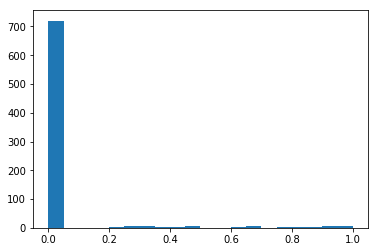

In [297]:
# Sanity Check by Kenneth
# I checked the distribution of pixel value over 780 features to categorize them into 3: 0, 1, 2
# I found that majority of pixels are '0', so I split them between 
# 0 - 0.1   = 0
# 0.1 - 0.8 = 1
# 0.8 - 1   = 2

plt.hist(mini_train_data[300], bins = 20)
print(np.median(mini_train_data[300]))
print(np.max(mini_train_data[300]))
print(np.min(mini_train_data[300]))
print(np.mean(mini_train_data[300]))

ANSWER:  
**Kenneth's  
Multinomial classification by naive Bayes actually worsen the prediction accuracy, presumably due to an extra classification we introduced into the features. **

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [269]:
def P8(alphas):

    ### STUDENT START ###
    
    # Without using GridSearchCV, just looping
    for value in alphas.values():
        for j in range(len(value)):
            BNB = BernoulliNB(alpha=value[j], binarize=0.333)
            BNB.fit(mini_train_data, mini_train_labels)
            print("Accuracy of Bernoulli Naive Bayes with alpha {:.4f} : {}".format(value[j], BNB.score(dev_data, dev_labels)))

    # Using GridSearchCV
    BNB = GridSearchCV(BernoulliNB(binarize=0.333), alphas)
    BNB.fit(mini_train_data, mini_train_labels)
    for i in range(len(BNB.grid_scores_)):
        print(BNB.grid_scores_[i])
          
    return BNB
        
    ### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Accuracy of Bernoulli Naive Bayes with alpha 0.0000 : 0.806
Accuracy of Bernoulli Naive Bayes with alpha 0.0001 : 0.821
Accuracy of Bernoulli Naive Bayes with alpha 0.0010 : 0.828
Accuracy of Bernoulli Naive Bayes with alpha 0.0100 : 0.831
Accuracy of Bernoulli Naive Bayes with alpha 0.1000 : 0.829
Accuracy of Bernoulli Naive Bayes with alpha 0.5000 : 0.823
Accuracy of Bernoulli Naive Bayes with alpha 1.0000 : 0.818
Accuracy of Bernoulli Naive Bayes with alpha 2.0000 : 0.812
Accuracy of Bernoulli Naive Bayes with alpha 10.0000 : 0.769


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


mean: 0.80900, std: 0.01874, params: {'alpha': 0.0}
mean: 0.82400, std: 0.01626, params: {'alpha': 0.0001}
mean: 0.82500, std: 0.01531, params: {'alpha': 0.001}
mean: 0.82500, std: 0.01507, params: {'alpha': 0.01}
mean: 0.82000, std: 0.01903, params: {'alpha': 0.1}
mean: 0.81400, std: 0.01236, params: {'alpha': 0.5}
mean: 0.80700, std: 0.00717, params: {'alpha': 1.0}
mean: 0.79900, std: 0.01046, params: {'alpha': 2.0}
mean: 0.73900, std: 0.01789, params: {'alpha': 10.0}


In [270]:
#print nb.best_params_
print(nb.best_params_)

{'alpha': 0.001}


ANSWER:  
**Kenneth's  
In my traditional implementation of plug and play without using GridSearchCV, the accuracy of predicting the digit using alpha at 0.01 is the highest with 0.831. Using the GridSearchCV, the best alpha was found at 0.001 which gives us 0.825 on average. The alpha smoothing gives the best prediction, presumably between 0.001 and 0.01, reflecting the parabola shape of the accuracy if we plot the alpha on x-axis and accuracy on y-axis.**

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

Accuracy of digit classification by Gaussian Naive Bayes : 0.621

Sigma value Vs Accuracy
The most accurate prediction with GaussianNB classifier is using sigma at 0.22

Accuracy of digit classification by Gaussian Naive Bayes with sigma 0.22 : 0.815


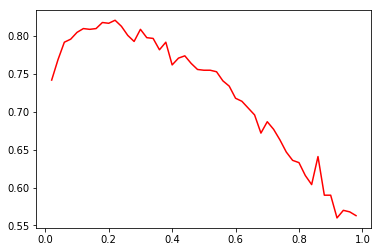

In [344]:
def P9():

    ### STUDENT END ###
    GNB = GaussianNB()
    GNB.fit(mini_train_data, mini_train_labels)
    print("Accuracy of digit classification by Gaussian Naive Bayes : {}\n".format(GNB.score(dev_data, dev_labels)))

    # To improve the GNB, we need to adjust the sigma to control the spread of the data
    # shown in next cell block (sanity check)
    
    sigmas = np.arange(0.02, 1, 0.02)
    accuracies = {}
    for sigma in sigmas:
        new_mini_train_data = mini_train_data + np.random.normal(0, scale=sigma, size=mini_train_data.shape)
        new_dev_data = dev_data + np.random.normal(0, scale=sigma, size=dev_data.shape)
        GNB1 = GaussianNB()
        GNB1.fit(new_mini_train_data, mini_train_labels)
        accuracies[sigma] = round(GNB1.score(new_dev_data, dev_labels), 3)
    
    print("Sigma value Vs Accuracy")
    plt.plot(sigmas, accuracies.values(), 'r')
    max_key = max(accuracies.keys(), key=(lambda key: accuracies[key]))
    print("The most accurate prediction with GaussianNB classifier is using sigma at {}\n".format(round(max_key, 2)))
        
    # With new train data
    new_mini_train_data1 = mini_train_data + np.random.normal(0, scale=0.2, size=mini_train_data.shape)
    new_dev_data1 = dev_data + np.random.normal(0, scale=0.22, size=dev_data.shape)
    GNB1 = GaussianNB()
    GNB1.fit(new_mini_train_data1, mini_train_labels)
    print("Accuracy of digit classification by Gaussian Naive Bayes with sigma 0.22 : {}".format(GNB1.score(new_dev_data1, dev_labels)))
    ### STUDENT END ###

gnb = P9()

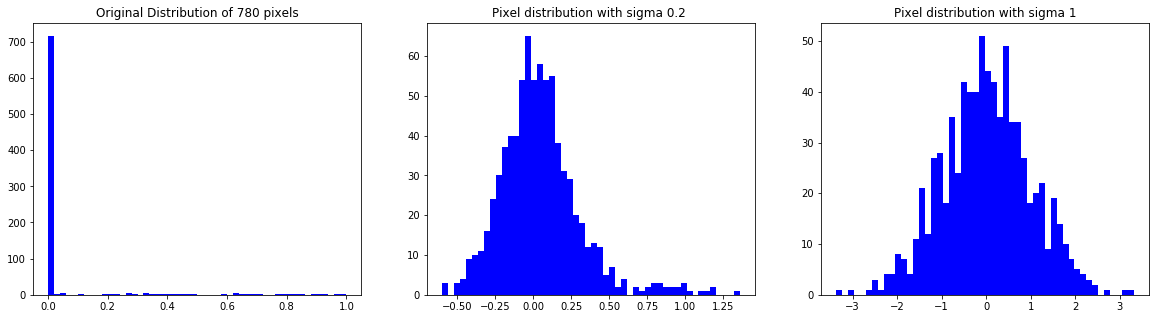

In [343]:
# Visualization of data transformation (Sanity check)
#Transformation of mini_train_data into Gaussian Distribution depending on the standard deviation, sigma

plt.figure(figsize=(20,5))

plt.subplot(1, 3, 1)
plt.hist(mini_train_data[300], bins=50, color='b')
plt.title("Original Distribution of 780 pixels")
plt.subplot(1, 3, 2)
# creating a new mini_train_data with standard deviation of 0.2
new_mini_train_data2 = mini_train_data + np.random.normal(0, scale=0.2, size=mini_train_data.shape)
new_mini_train_data3 = mini_train_data + np.random.normal(0, scale=1, size=mini_train_data.shape)
plt.hist(new_mini_train_data2[300], bins=50, color='b')
plt.title("Pixel distribution with sigma 0.2 ")
plt.subplot(1, 3, 3)
plt.hist(new_mini_train_data3[300], bins=50, color='b')
plt.title("Pixel distribution with sigma 1")
plt.show()

ANSWER:  
**Kenneth's  
Digit classification by Gaussian Naive Bayes performs worse than a prior Bernoulli classification. After checking the distribution of the pixel value, it's mostly due to the distribution of the pixel values. Gaussian classificaion performs well when the data are normally distributed. In order to simulate the normal distribution, I implemented the distribution using np.random.normal with different parameters on standard deviation while holding the mean value at 0. The performance improves as sigma values increases (shown above). At sigma=0.22, the accuracy is 0.815, comparable to Bernoulli classification. However after 0.22 sigma value, the performance becomes worse. This reflects the underlying requirement for Gaussian Classification to work, i.e., normally distributed data.**

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

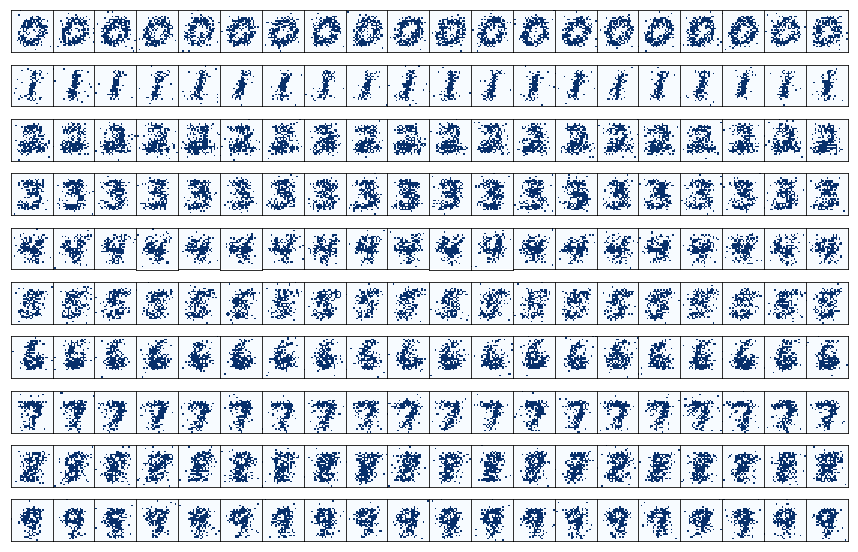

In [355]:
def P10(num_examples):

    ### STUDENT START ###
    BNB = BernoulliNB()
    BNB.fit(mini_train_data, mini_train_labels)
    probs = np.exp(BNB.feature_log_prob_)
    plt.rc('image', cmap='Blues')
    plt.figure(figsize=(15, 10))
    
    for i in range(len(np.unique(mini_train_labels))):
        for j in range(num_examples):
            
            # a exemple digit with 780 pixels value assigned randomly 
            # np.where(condition[,x, y]), if the condition is true, x is assigned, otherwise y. 
            example = np.where(probs[i,:]>np.random.rand(mini_train_data.shape[1]),1,0)             
            plt.subplot(len(np.unique(mini_train_labels)), num_examples, i * num_examples + j + 1)
            plt.subplots_adjust(wspace=0, hspace=0)

            ax = plt.gca()                                # assigning plot axes to 'ax'
            ax.set_xticks([])                             # removing ticks on x-axis
            ax.set_yticks([])                             # removing ticks on y-axis

            plt.imshow(example.reshape(28, 28))

    ### STUDENT END ###

P10(20)

ANSWER:  
**Kenneth's  
20 examples are generated for each digit. Generated digits are blurry although they still retain the overall morphology (or probabilities of each pixel). We can also conceptualize why the digit classification between 2, 3 and 8, or between 4 and 9 are generally mis-matched in earlier exploration of K nearest neighbor classification.**

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [433]:
def P11(buckets, correct, total):
    
    ### STUDENT START ###

    BNB = BernoulliNB(alpha=0.01, binarize=0.333)
    BNB.fit(mini_train_data, mini_train_labels)
    
    # This is predicted probability for each data 
    # np.digitize begins at index '1', so to align with the buckets, subtract by 1
    predicted_probability = np.amax(BNB.predict_proba(dev_data), axis=1)
    predicted_digitize = np.digitize(predicted_probability, buckets)
    for i in predicted_digitize:
        total[i-1] += 1

        
    # retrieving the digit by index information
    # compare the predicted digit and actual digit, check with the predicted probability
    # to align with buckets, total, correct list is also subtracted by 1 
    predicted_digit = np.argmax(BNB.predict_proba(dev_data), axis=1)
    correct_probability = predicted_probability[predicted_digit == dev_labels]
    correct_digitize = np.digitize(correct_probability, buckets)
    for i in correct_digitize:
        correct[i-1] += 1
    
    ### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print("p(pred) <= {:.13f}    total = {}    accuracy = {:.3f}".format(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total = 29    accuracy = 0.517
p(pred) <= 0.9000000000000    total = 96    accuracy = 0.438
p(pred) <= 0.9990000000000    total = 67    accuracy = 0.642
p(pred) <= 0.9999900000000    total = 58    accuracy = 0.655
p(pred) <= 0.9999999000000    total = 59    accuracy = 0.763
p(pred) <= 0.9999999990000    total = 64    accuracy = 0.844
p(pred) <= 0.9999999999900    total = 72    accuracy = 0.833
p(pred) <= 0.9999999999999    total = 17    accuracy = 0.941
p(pred) <= 1.0000000000000    total = 538    accuracy = 0.963


ANSWER:  
**Kenneth's  
Naive Bayes classifier is either weakly calibrated or poorly calibrated based on the definition stated earlier. The posterior probability of 90% only gives the accuracy of 43% although the accuracy also goes up as the posterior probability is also increased from 90% to 100%. If highly calibrated classifier should give 90% accuracy for 90% posterior probability, our classifer here fails to meet the requirement.**

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

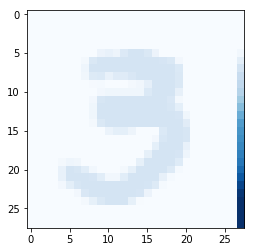

In [578]:
x = new_dev[0].reshape(1, 784)
plt.imshow(x.reshape(28,28))


In [585]:
#def P12():

    ### STUDENT START ###

#     BNB = BernoulliNB()
#     BNB.fit(new_mini, mini_train_labels)
#     print(BNB.score(new_dev, dev_labels))


    ### STUDENT END ###

#P12()

# A few attempts
1. I tried flipping the pixel values to make it black and white contrast. It worsens with accuracy at 0.219. I guess that high intensity 
pixel values have a high influence on prediction in Naive Bayes because majority of pixels in digit 1 will be
black which oversaturates the probability. 

2. I also tried adding all pixel values in each row, representing their aggregate value at the rightmost column. Similarly, I would also try to add pixel values column-wise. So for digit '1', it rightmost column (28th) will have intensity along the column but in the bottom of the row (28th row), there will be only one or two pixels showing the intensity because the digit 1 is a vertical line and it won't have any pixel values on the either side of the vertical line. I was thinking of adding these two additional features and see if it helps to improve the prediction. However, after the row add-on, as I tried above, it requires more time to deal with reshaping the rows and columns. 

Due to time constraint, I stopped here unfortunately. 